<h1 style="color: green;">Imports</h1>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import SGDRegressor

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor

from sklearn.neighbors import KNeighborsRegressor

from sklearn.svm import SVR
from sklearn.svm import LinearSVR

from sklearn.kernel_ridge import KernelRidge


from xgboost import XGBRegressor

from sklearn.ensemble import VotingRegressor

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

from sklearn.metrics import make_scorer
from sklearn.metrics import mean_squared_error
from sklearn.metrics import explained_variance_score
from sklearn.metrics import r2_score


# Feature selection
from sklearn.feature_selection import VarianceThreshold, mutual_info_regression, SelectPercentile


import joblib


# Model monitoring with evidently
# from evidently.dashboard import Dashboard
# from evidently.pipeline.column_mapping import ColumnMapping
# from evidently.dashboard.tabs import RegressionPerformanceTab

<h1 style="color: green;">Reading in the data</h1>

In [2]:
raw0 = pd.read_csv("../Data/Model_data.csv")
raw0.drop(['Venue_id','Trips_response_lt_4','Trips_response_lt_5','Trips_response_lt_6'], axis=1, inplace=True)
raw0.tail()

,Total_Nbr_of_Items,Total_Price,Date_diff,Week_day_numeric,Nbr_trips_per_wk,Nbr_items_per_wk,Nbr_items_wk_perc,Expenditure_per_wk,Total_Exp_wk_perc,hour,...,Millets,LinkedIn,Petrol_station_random,Welcome_break_service,National_express,The_moon_and_Bell,The_Griffin,Bel_foundry,Laundrette,John_Lewis
822,1,1.80,1.0,2,5,17,0.058824,67.10,0.026826,9,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
823,5,19.40,0.0,6,2,24,0.208333,39.55,0.490518,18,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
824,13,14.81,1.0,3,5,17,0.764706,67.10,0.220715,11,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
825,1,2.50,1.0,4,5,17,0.058824,67.10,0.037258,16,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
826,1,40.00,0.0,4,5,17,0.058824,67.10,0.596125,17,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<h1 style="color: green;">Feature selection</h1>

<h3 style="color: green;">Handling low variance features</h3>

In [3]:
raw0.shape

(827, 199)

In [4]:
# Removing zero variance features
var_threshold = VarianceThreshold(threshold=0)
var_threshold.fit(raw0)

VarianceThreshold(threshold=0)

In [5]:
var_threshold.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

<p>
As can be seen from the output above, there are no features that matched the 0 variance threshold.<br>
However, there are sparse features in the list, features with only one value.<br>
These will be handled later.
</p>

In [6]:
# Retrieving the zero variance column names
# If there was any features with zero variance, the code below would capture them
constant_columns = [column for column in raw0.columns
                    if column not in raw0.columns[var_threshold.get_support()]
                   ]
for feature in constant_columns:
    print(feature)

<h3 style="color: green;">Handling correlated features</h3>

In [7]:
def correlation(dataset, threshold):
    col_corr =  set()
    corr_matrix = dataset.corr()
    
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [8]:
# Retrieving the highly correlated features
x_cor = 0.7
x = correlation(raw0,x_cor)
print("There are: {0} highly correlated features that meet the {1} threshold".format(len(x),x_cor))
x

There are: 78 highly correlated features that meet the 0.7 threshold


{'Apple',
 'Bread_exp_receipt',
 'Bread_exp_wk',
 'Bread_wk_exp_perc',
 'Bread_wk_perc',
 'Breakfast_exp_receipt',
 'Breakfast_exp_wk',
 'Breakfast_wk_exp_perc',
 'Breakfast_wk_perc',
 'Clothes_and_shoes_exp_receipt',
 'Clothes_and_shoes_exp_wk',
 'Clothes_and_shoes_wk_exp_perc',
 'Clothes_and_shoes_wk_perc',
 'Cooked_meats_exp_receipt',
 'Cooked_meats_exp_wk',
 'Cooked_meats_wk_perc',
 'Cooking_base_exp_wk',
 'Cooking_base_wk_exp_perc',
 'Cooking_base_wk_perc',
 'Cosmetics_and_selfcare_exp_receipt',
 'Cosmetics_and_selfcare_exp_wk',
 'Cosmetics_and_selfcare_wk_exp_perc',
 'Cosmetics_and_selfcare_wk_perc',
 'DIY_exp_receipt',
 'DIY_exp_wk',
 'DIY_wk_exp_perc',
 'Dairy_produce_exp_receipt',
 'Dairy_produce_exp_wk',
 'Dairy_produce_wk_exp_perc',
 'Dairy_produce_wk_perc',
 'Dominos_Pizza',
 'Drinks_exp_wk',
 'Drinks_wk_exp_perc',
 'Eating_out_exp_receipt',
 'Eating_out_exp_wk',
 'Eating_out_wk_exp_perc',
 'Eating_out_wk_perc',
 'Education_exp_receipt',
 'Education_exp_wk',
 'Education_wk_

In [9]:
correlations = raw0.corr()

In [10]:
# Checking correlations manually
Vegetables_wk_perc = correlations.Vegetables_wk_perc.nlargest(10).sort_values()
Vegetables_wk_perc


Raw_meats_exp_receipt     0.484736
Raw_meats_receipt         0.538724
Raw_meats_wk_exp_perc     0.592561
Raw_meats_wk_perc         0.597296
Nbr_items_wk_perc         0.634854
Vegetables_exp_receipt    0.643102
Total_Nbr_of_Items        0.682897
Vegetables_wk_exp_perc    0.799762
Vegetables_receipt        0.837249
Vegetables_wk_perc        1.000000
Name: Vegetables_wk_perc, dtype: float64

<p style="color: green">Highly correlated features to drop</p>
<p>
The list of features below is the outcome of manually comparing the feature correlations, above, feature by<br>
feature and deciding which feature to keep and which one to drop on the basis of the degree of correlation<br>
and logical intuition and preference.
</p>

In [11]:
drop_list = ['Apple','Bread_wk_perc','Bread_wk_exp_perc','Bread_receipt','Bread_exp_wk',
             'Breakfast_receipt','Breakfast_wk_exp_perc','Breakfast_exp_wk','Clothes_and_shoes_wk_exp_perc',
             'Clothes_and_shoes_receipt','Clothes_and_shoes_exp_wk','Cooked_meats_exp_wk','Cooked_meats_receipt',
             'Cooking_base_exp_wk','Cosmetics_and_selfcare_wk_exp_perc','Cosmetics_and_selfcare_exp_wk',
             'Cosmetics_and_selfcare_receipt','DIY_wk_perc','DIY_wk_exp_perc','DIY_exp_wk',
             'Dairy_produce_receipt','Dairy_produce_wk_exp_perc','Dairy_produce_exp_wk','Dominos_Pizza',
             'Drinks_wk_exp_perc','Drinks_exp_wk','Eating_out_wk_perc','Eating_out_wk_exp_perc',
             'Eating_out_exp_wk','Eating_out_receipt','Udemy','Education_wk_perc','Education_wk_exp_perc',
             'Education_exp_wk','Electronics_receipt','Electronics_wk_exp_perc','Electronics_wk_perc',
             'Electronics_exp_wk','Fruit_wk_exp_perc','Fruit_receipt','Fruit_exp_wk','House_and_kitchen_exp_wk',
             'House_and_kitchen_wk_perc','Laptops_with_linux','Nbr_items_wk_perc','hour','Ptype_Cash',
             'Raw_meats_receipt','Raw_meats_exp_wk','Raw_meats_wk_exp_perc','Seasoning_wk_perc',
             'Seasoning_receipt','Seasoning_wk_exp_perc','Seasoning_exp_wk','Snacks_receipt','Snacks_exp_wk',
             'Snacks_wk_exp_perc','Tech_and_services_exp_wk','Transport_exp_wk','Transport_wk_perc',
             'Vegetables_exp_wk','Vegetables_receipt','Vegetables_wk_exp_perc','Cooking_base_wk_perc',
             'Cooking_base_receipt','Tech_and_services_receipt','Tech_and_services_wk_perc'
            ]

len(drop_list)

67

<p style="color: green">Dropping the highly correlated features</p>

In [12]:
print(f"Shape before dropping features: {raw0.shape}")
raw0.drop(drop_list, axis=1, inplace=True)
print(f"Shape after dropping features: {raw0.shape}")

Shape before dropping features: (827, 199)
Shape after dropping features: (827, 132)


In [13]:
# Rechecking highly correlated features
x = correlation(raw0,x_cor)
x

{'SRC_Cash_or_plan'}

In [14]:
correlations = raw0.corr()

In [15]:
SRC_Cash_or_plan = correlations.SRC_Cash_or_plan.nlargest(10).sort_values(ascending=False)
SRC_Cash_or_plan

SRC_Cash_or_plan          1.000000
Maryland                  0.465016
Ptype_Plan                0.213819
Eating_out_wk             0.174176
Skylink                   0.136870
Currys_PC_World           0.125420
Angies_Fish_Bar           0.123299
Laundrette                0.123299
B_and_M                   0.123299
Eating_out_exp_receipt    0.109026
Name: SRC_Cash_or_plan, dtype: float64

<p>
There doesn't appear to be any strong correlation between SRC_Cash_or_plan and any other feature so it can be assumed that all the strongly correlated features have been removed. In the majority of the cases only the features ending with <b>_receipt</b> such as Bread_exp_receipt has been kept.<br><br>
This is a matter of choice: equallly, only the features ending in <b>_exp_wk</b> such as Bread_exp_wk could have been kept, this would have achieved the same result.
</p>

<h3 style="color: green;">Feature selection using information gain</h3>

In [16]:
y = raw0.Total_Price
X = raw0.drop('Total_Price', axis=1)

In [17]:
mutual_info = mutual_info_regression(X,y, random_state=43)
mutual_info[:10]


array([0.47479509, 0.01782456, 0.05428085, 0.09821041, 0.02911777,
       0.10732338, 0.47878233, 0.12557551, 0.04972314, 0.        ])

In [18]:
mutual_info_series = pd.Series(mutual_info)
mutual_info_series.index = X.columns
mutual_info_series.sort_values(ascending=False)

Total_Exp_wk_perc         0.478782
Total_Nbr_of_Items        0.474795
Raw_meats_exp_receipt     0.248587
Vegetables_exp_receipt    0.201537
Raw_meats_wk_perc         0.181545
                            ...   
Superdrug                 0.000000
Bounce_mania              0.000000
Gregs                     0.000000
Piri_piri_chicken         0.000000
BP                        0.000000
Length: 131, dtype: float64

In [19]:
mutual_info_series.sort_values(ascending=False)[:30]

Total_Exp_wk_perc                0.478782
Total_Nbr_of_Items               0.474795
Raw_meats_exp_receipt            0.248587
Vegetables_exp_receipt           0.201537
Raw_meats_wk_perc                0.181545
Vegetables_wk_perc               0.157323
Drinks_exp_receipt               0.150166
Cooked_meats_exp_receipt         0.137924
SRC_Contactless                  0.132386
Part_of_day_num                  0.125576
Tech_and_services_exp_receipt    0.118420
Cooked_meats_wk_perc             0.112828
Dairy_produce_exp_receipt        0.109460
Tech_and_services_wk_exp_perc    0.108167
Expenditure_per_wk               0.107323
SRC_DD                           0.105995
Bread_exp_receipt                0.105242
Snacks_exp_receipt               0.099655
Nbr_trips_per_wk                 0.098210
Drinks_wk_perc                   0.097708
Eating_out_exp_receipt           0.096576
Dairy_produce_wk_perc            0.091841
Aldi                             0.091809
Yours_Supermarket                0

<AxesSubplot: title={'center': 'Information gained top 30'}, ylabel='Information gained'>

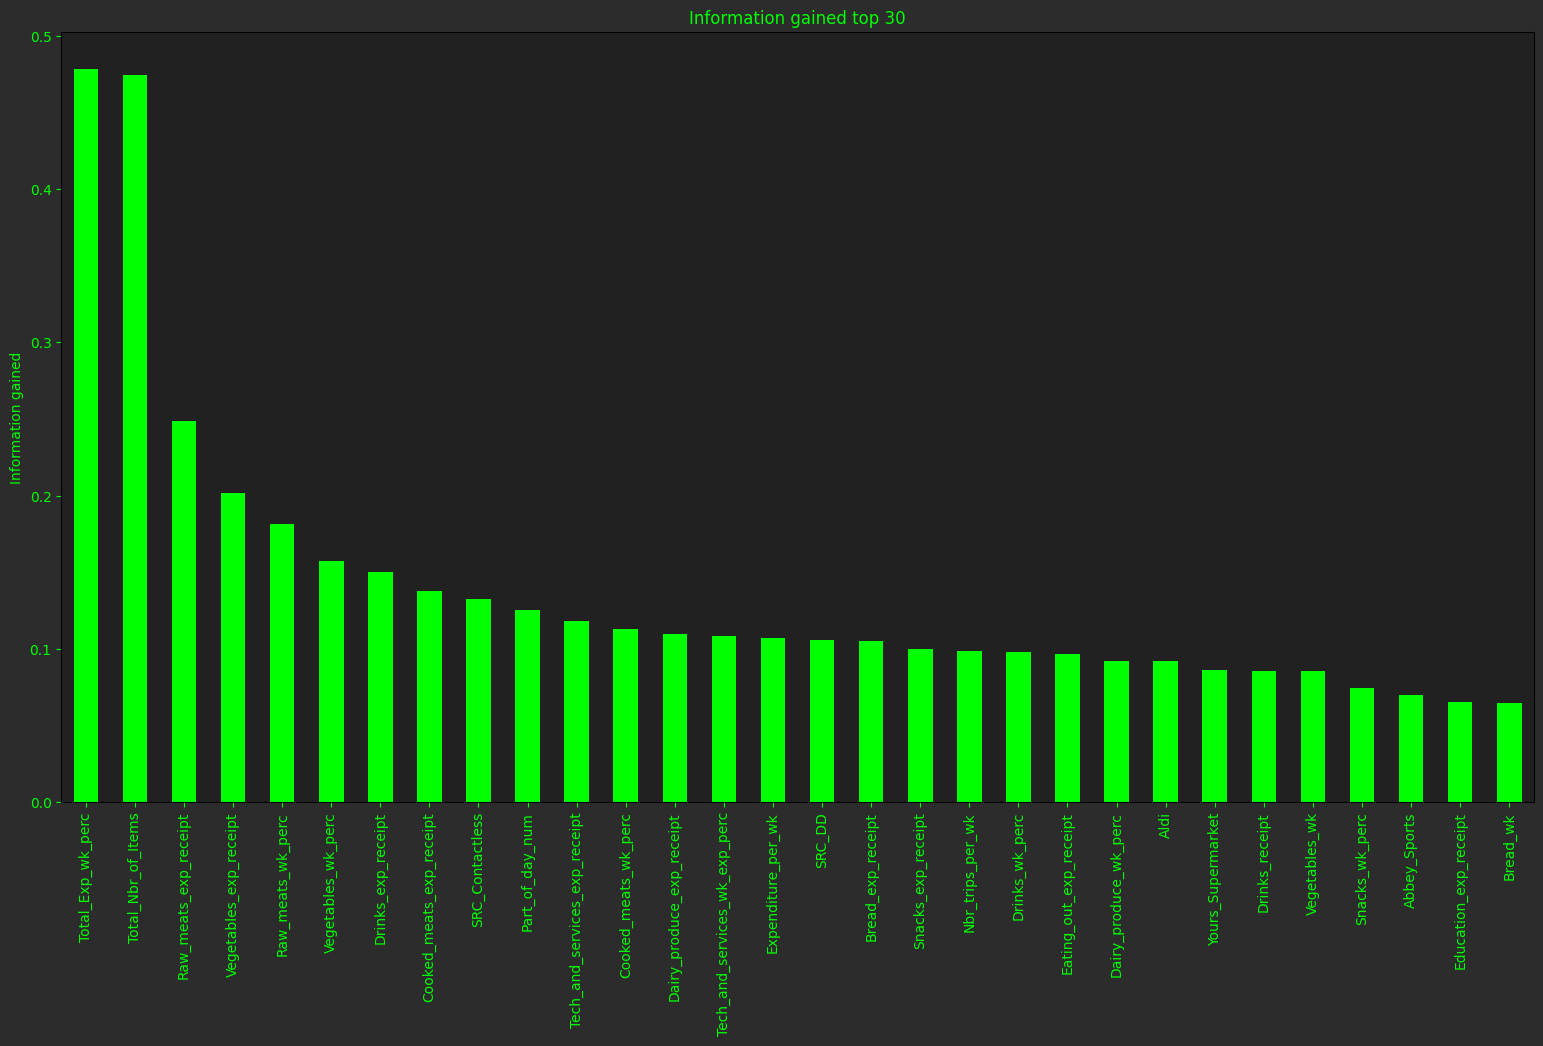

In [20]:
# Plotting the top 30 above
font1 = {'family':'serif','color':'lime','size':20}
fig = plt.figure()
fig.patch.set_facecolor('#212121')
fig.patch.set_alpha(0.95)

ax = fig.add_subplot(111)
ax.patch.set_facecolor('#212121')
ax.patch.set_alpha(1.0)
ax.yaxis.label.set_color('lime')
ax.xaxis.label.set_color('lime')
ax.title.set_color('lime')
ax.tick_params(colors='lime', which='both')

mutual_info_series.sort_values(ascending=False)[:30].plot.bar(figsize=(19,10), 
                                                              color="lime",
                                                              ylabel="Information gained",
                                                              title="Information gained top 30"
                                                             )

<h3 style="color: green;">Subsetting top percentiles of features</h3>

In [21]:
# Top 40 percentile of features
selected_top_columns = SelectPercentile(mutual_info_regression, percentile=40)
selected_top_columns.fit(X,y)
top_40 = X.columns[selected_top_columns.get_support()]

# Top 30 percentile of features
selected_top_columns = SelectPercentile(mutual_info_regression, percentile=30)
selected_top_columns.fit(X,y)
top_30 = X.columns[selected_top_columns.get_support()]

# Top 10 percentile of features
selected_top_columns10 = SelectPercentile(mutual_info_regression, percentile=10)
selected_top_columns10.fit(X,y)
top_10 = X.columns[selected_top_columns10.get_support()]

print(f"Top 40 percentile length: {len(top_40)}")
print(f"Top 30 percentile length: {len(top_30)}")
print(f"Top 10 percentile length: {len(top_10)}")

Top 40 percentile length: 52
Top 30 percentile length: 39
Top 10 percentile length: 13


In [22]:
top_40

Index(['Total_Nbr_of_Items', 'Week_day_numeric', 'Nbr_trips_per_wk',
       'Nbr_items_per_wk', 'Expenditure_per_wk', 'Total_Exp_wk_perc',
       'Part_of_day_num', 'Ptype_Card', 'SRC_Contactless', 'SRC_DB', 'SRC_DD',
       'Bread_wk', 'Bread_exp_receipt', 'Cooked_meats_wk_perc',
       'Cooked_meats_exp_receipt', 'Raw_meats_wk', 'Raw_meats_wk_perc',
       'Raw_meats_exp_receipt', 'Eating_out_wk', 'Eating_out_exp_receipt',
       'Snacks_wk', 'Snacks_wk_perc', 'Snacks_exp_receipt', 'Drinks_receipt',
       'Drinks_wk', 'Drinks_wk_perc', 'Drinks_exp_receipt', 'Vegetables_wk',
       'Vegetables_wk_perc', 'Vegetables_exp_receipt', 'Fruit_wk',
       'Fruit_wk_perc', 'Fruit_exp_receipt', 'Cooking_base_exp_receipt',
       'Cooking_base_wk_exp_perc', 'Dairy_produce_wk', 'Dairy_produce_wk_perc',
       'Dairy_produce_exp_receipt', 'Seasoning_exp_receipt',
       'Transport_exp_receipt', 'Education_receipt', 'Education_exp_receipt',
       'Tech_and_services_wk', 'Tech_and_services_exp_rec

In [23]:
top_30

Index(['Total_Nbr_of_Items', 'Week_day_numeric', 'Nbr_trips_per_wk',
       'Expenditure_per_wk', 'Total_Exp_wk_perc', 'Part_of_day_num',
       'SRC_Cash_or_plan', 'SRC_Contactless', 'SRC_DD', 'Bread_wk',
       'Bread_exp_receipt', 'Cooked_meats_wk_perc', 'Cooked_meats_exp_receipt',
       'Raw_meats_wk', 'Raw_meats_wk_perc', 'Raw_meats_exp_receipt',
       'Eating_out_exp_receipt', 'Snacks_wk', 'Snacks_wk_perc',
       'Snacks_exp_receipt', 'Drinks_receipt', 'Drinks_wk', 'Drinks_wk_perc',
       'Drinks_exp_receipt', 'Vegetables_wk', 'Vegetables_wk_perc',
       'Vegetables_exp_receipt', 'Fruit_wk', 'Fruit_wk_perc',
       'Dairy_produce_wk_perc', 'Dairy_produce_exp_receipt',
       'Education_exp_receipt', 'Tech_and_services_wk',
       'Tech_and_services_exp_receipt', 'Tech_and_services_wk_exp_perc',
       'Abbey_Sports', 'Aldi', 'Tesco', 'Yours_Supermarket'],
      dtype='object')

In [24]:
# Checking that the top 30 are a subset of the top 40
for item in top_30:
    if item not in top_40:
        print(item)

SRC_Cash_or_plan


In [25]:
top_10

Index(['Total_Nbr_of_Items', 'Total_Exp_wk_perc', 'SRC_Contactless', 'SRC_DD',
       'Cooked_meats_wk_perc', 'Cooked_meats_exp_receipt', 'Raw_meats_wk_perc',
       'Raw_meats_exp_receipt', 'Snacks_exp_receipt', 'Drinks_exp_receipt',
       'Vegetables_wk_perc', 'Vegetables_exp_receipt',
       'Tech_and_services_exp_receipt'],
      dtype='object')

In [26]:
# Checking that the top 10 are a subset of the top 40
for item in top_10:
    if item not in top_40:
        print(item)

<h3 style="color: green;">Subsetting raw data by top n features by information gain</h3>
<p>
Below the raw data is used to subset the top 40, top 30 and top 10 features by information gain<br>
This is being done because the top 30 and top 10 features subsets <b>may include features not in top 40</b><br>
Although this is intuitively odd, it is the case above. Thus to avoid future errors as in the previous github <br> branche: the train test split and scaling was done with top 40 features then subseting of top 40 was done<br>
for top 30 and top 10 respectively. This creates errors when scale transforming sampled new data.<br><br>
These top feature subsets are created for comparing models built with these subset features. This is because<br>
stepwise methods:

<ul>
<li>forward selection</li>
<li>backward elimination</li>
<li>bi-directional elimination</li>
</ul>
are not employed here for feature selection.
</p>

In [27]:
#  Keeping the top 40 percentile features on the basis of information gain
raw1_top_40_features = X[top_40]
print(raw1_top_40_features.shape)
raw1_top_40_features.head()

(827, 52)


,Total_Nbr_of_Items,Week_day_numeric,Nbr_trips_per_wk,Nbr_items_per_wk,Expenditure_per_wk,Total_Exp_wk_perc,Part_of_day_num,Ptype_Card,SRC_Contactless,SRC_DB,...,Tech_and_services_wk,Tech_and_services_exp_receipt,Tech_and_services_wk_exp_perc,Cosmetics_and_selfcare_wk_perc,Cosmetics_and_selfcare_exp_receipt,Abbey_Sports,Aldi,Tesco,Maryland,Yours_Supermarket
0,8,4,3,40,31.76,0.213476,1,1.0,1.0,0.0,...,0,0.0,0.0,0.0,0.00,0.0,1.0,0.0,0.0,0.0
1,9,3,4,42,65.20,0.096933,2,1.0,1.0,0.0,...,0,0.0,0.0,0.0,0.00,0.0,1.0,0.0,0.0,0.0
2,9,3,4,34,31.42,0.236792,2,1.0,1.0,0.0,...,0,0.0,0.0,0.5,0.85,0.0,1.0,0.0,0.0,0.0
3,12,3,3,26,36.44,0.226948,2,1.0,1.0,0.0,...,0,0.0,0.0,0.0,0.00,0.0,1.0,0.0,0.0,0.0
4,11,1,3,40,31.76,0.255038,1,1.0,1.0,0.0,...,0,0.0,0.0,0.0,0.00,0.0,1.0,0.0,0.0,0.0


In [28]:
#  Keeping the top 30 percentile features on the basis of information gain
raw1_top_30_features = X[top_30]
print(raw1_top_30_features.shape)
raw1_top_30_features.head()

(827, 39)


,Total_Nbr_of_Items,Week_day_numeric,Nbr_trips_per_wk,Expenditure_per_wk,Total_Exp_wk_perc,Part_of_day_num,SRC_Cash_or_plan,SRC_Contactless,SRC_DD,Bread_wk,...,Dairy_produce_wk_perc,Dairy_produce_exp_receipt,Education_exp_receipt,Tech_and_services_wk,Tech_and_services_exp_receipt,Tech_and_services_wk_exp_perc,Abbey_Sports,Aldi,Tesco,Yours_Supermarket
0,8,4,3,31.76,0.213476,1,0.0,1.0,0.0,3,...,0.250000,3.08,0.0,0,0.0,0.0,0.0,1.0,0.0,0.0
1,9,3,4,65.20,0.096933,2,0.0,1.0,0.0,2,...,0.000000,0.00,0.0,0,0.0,0.0,0.0,1.0,0.0,0.0
2,9,3,4,31.42,0.236792,2,0.0,1.0,0.0,1,...,0.333333,0.69,0.0,0,0.0,0.0,0.0,1.0,0.0,0.0
3,12,3,3,36.44,0.226948,2,0.0,1.0,0.0,2,...,0.666667,1.54,0.0,0,0.0,0.0,0.0,1.0,0.0,0.0
4,11,1,3,31.76,0.255038,1,0.0,1.0,0.0,3,...,0.500000,3.08,0.0,0,0.0,0.0,0.0,1.0,0.0,0.0


In [29]:
#  Keeping the top 10 percentile features on the basis of information gain
raw1_top_10_features = X[top_10]
print(raw1_top_10_features.shape)
raw1_top_10_features.head()

(827, 13)


,Total_Nbr_of_Items,Total_Exp_wk_perc,SRC_Contactless,SRC_DD,Cooked_meats_wk_perc,Cooked_meats_exp_receipt,Raw_meats_wk_perc,Raw_meats_exp_receipt,Snacks_exp_receipt,Drinks_exp_receipt,Vegetables_wk_perc,Vegetables_exp_receipt,Tech_and_services_exp_receipt
0,8,0.213476,1.0,0.0,0.333333,1.39,0.250000,1.18,1.46,0.0,0.0,0.00,0.0
1,9,0.096933,1.0,0.0,1.000000,1.45,0.250000,1.69,2.19,0.0,0.0,0.00,0.0
2,9,0.236792,1.0,0.0,0.500000,1.45,0.250000,1.69,0.00,0.0,0.5,2.58,0.0
3,12,0.226948,1.0,0.0,1.000000,1.39,0.666667,4.72,13.14,0.0,0.0,0.00,0.0
4,11,0.255038,1.0,0.0,0.333333,1.39,0.250000,1.18,5.84,0.0,0.0,0.00,0.0


<h3 style="color: green;">Splitting the data into training and test</h3>

In [30]:
y = raw0.Total_Price
y.shape

(827,)

In [31]:
# Top 40 features based on information gain
X_train_t40,X_test_t40, y_train_t40,y_test_t40 = train_test_split(raw1_top_40_features,
                                                                  y, 
                                                                  test_size=0.29,
                                                                  random_state=44)

In [32]:
# Top 30 features based on information gain
X_train_t30,X_test_t30, y_train_t30,y_test_t30 = train_test_split(raw1_top_30_features,
                                                                  y, 
                                                                  test_size=0.29,
                                                                  random_state=44)

In [33]:
# Top 10 features based on information gain
X_train_t10,X_test_t10, y_train_t10,y_test_t10 = train_test_split(raw1_top_10_features,
                                                                  y, 
                                                                  test_size=0.29,
                                                                  random_state=44)

<h3 style="color: green;">Scaling target and features with StandardScaler</h3>

In [34]:
# Top 40 features y reshape
y_train_t40 = y_train_t40.values.reshape(-1,1)
y_test_t40 = y_test_t40.values.reshape(-1,1)

# Top 40 features y fitting
y_scaler_t40 = StandardScaler()
y_scaler_t40.fit(y_train_t40)

# Saving the y_scaler
# DO NOT RUN THIS AGAIN
# joblib.dump(y_scaler_t40,'../Models/y_scaler_top40_04042023')

# tranforming the training and testing target
y_train_t40 = y_scaler_t40.transform(y_train_t40)
y_test_t40 = y_scaler_t40.transform(y_test_t40)

In [35]:
# Top 30 features y reshape
y_train_t30 = y_train_t30.values.reshape(-1,1)
y_test_t30 = y_test_t30.values.reshape(-1,1)

# Top 30 features y fitting
y_scaler_t30 = StandardScaler()
y_scaler_t30.fit(y_train_t30)

# Saving the y_scaler
# DO NOT RUN THIS AGAIN
# joblib.dump(y_scaler_t30,'../Models/y_scaler_top30_04042023')

# tranforming the training and testing target
y_train_t30 = y_scaler_t30.transform(y_train_t30)
y_test_t30 = y_scaler_t30.transform(y_test_t30)

In [36]:
# Top 10 features y reshape
y_train_t10 = y_train_t10.values.reshape(-1,1)
y_test_t10 = y_test_t10.values.reshape(-1,1)

# Top 10 features y fitting
y_scaler_t10 = StandardScaler()
y_scaler_t10.fit(y_train_t10)

# Saving the y_scaler
# DO NOT RUN THIS AGAIN
# joblib.dump(y_scaler_t10,'../Models/y_scaler_top10_04042023')

# tranforming the training and testing target
y_train_t10 = y_scaler_t10.transform(y_train_t10)
y_test_t10 = y_scaler_t10.transform(y_test_t10)

<h3 style="color: green;">Fitting and transforming X with StandardScaler</h3>

In [37]:
# fit and transform top top 40 data, X_train_t40
top_40_features_columns = raw1_top_40_features.columns
top_40_X_scaler =  StandardScaler()
top_40_X_scaler.fit(X_train_t40)

# Saving the X_scaler
# DO NOT RUN THIS AGAIN
joblib.dump(top_40_X_scaler,'../Models/X_scaler_top40_Regressor04042023')

# Transforming X_train and X_test
X_train_t40 = top_40_X_scaler.transform(X_train_t40)
X_test_t40 = top_40_X_scaler.transform(X_test_t40)

# Converting the arrays to DataFrames
X_train_t40 = pd.DataFrame(X_train_t40, columns=top_40_features_columns)
X_test_t40 = pd.DataFrame(X_test_t40, columns=top_40_features_columns)

X_train_t40.head()

,Total_Nbr_of_Items,Week_day_numeric,Nbr_trips_per_wk,Nbr_items_per_wk,Expenditure_per_wk,Total_Exp_wk_perc,Part_of_day_num,Ptype_Card,SRC_Contactless,SRC_DB,...,Tech_and_services_wk,Tech_and_services_exp_receipt,Tech_and_services_wk_exp_perc,Cosmetics_and_selfcare_wk_perc,Cosmetics_and_selfcare_exp_receipt,Abbey_Sports,Aldi,Tesco,Maryland,Yours_Supermarket
0,-0.508363,1.071121,1.274431,1.475415,0.420746,-0.583656,1.556529,0.255609,0.572760,-0.19262,...,-0.495020,-0.077711,-0.208747,-0.383123,-0.282839,-0.109859,-0.665027,-0.223807,-0.117545,-0.266773
1,1.459563,1.071121,-0.812710,-0.873191,-0.530668,0.366994,0.264192,0.255609,0.572760,-0.19262,...,-0.495020,-0.077711,-0.208747,0.828748,0.075095,-0.109859,1.503699,-0.223807,-0.117545,-0.266773
2,-0.687266,-0.944097,-0.812710,-0.792204,2.732454,-0.988954,0.264192,-3.912232,-1.745931,-0.19262,...,3.568991,-0.077711,-0.208747,-0.383123,-0.282839,-0.109859,1.503699,-0.223807,-0.117545,-0.266773
3,1.280661,1.071121,-0.216384,0.422592,-0.255744,0.115471,0.264192,0.255609,0.572760,-0.19262,...,-0.495020,-0.077711,-0.208747,-0.383123,-0.282839,-0.109859,-0.665027,-0.223807,-0.117545,-0.266773
4,-0.866168,0.063512,0.379942,1.394429,-0.501408,-0.908772,-1.028146,0.255609,0.572760,-0.19262,...,-0.495020,-0.077711,-0.208747,-0.383123,-0.282839,-0.109859,-0.665027,-0.223807,-0.117545,3.748504


In [38]:
# fit and transform top top 30 data, X_train_t40
top_30_features_columns = raw1_top_30_features.columns
top_30_X_scaler =  StandardScaler()
top_30_X_scaler.fit(X_train_t30)

# Saving the X_scaler
# DO NOT RUN THIS AGAIN
joblib.dump(top_30_X_scaler,'../Models/X_scaler_top30_Regressor04042023')

# Transforming X_train and X_test
X_train_t30 = top_30_X_scaler.transform(X_train_t30)
X_test_t30 = top_30_X_scaler.transform(X_test_t30)

# Converting the arrays to DataFrames
X_train_t30 = pd.DataFrame(X_train_t30, columns=top_30_features_columns)
X_test_t30 = pd.DataFrame(X_test_t30, columns=top_30_features_columns)

X_train_t30.head()

,Total_Nbr_of_Items,Week_day_numeric,Nbr_trips_per_wk,Expenditure_per_wk,Total_Exp_wk_perc,Part_of_day_num,SRC_Cash_or_plan,SRC_Contactless,SRC_DD,Bread_wk,...,Dairy_produce_wk_perc,Dairy_produce_exp_receipt,Education_exp_receipt,Tech_and_services_wk,Tech_and_services_exp_receipt,Tech_and_services_wk_exp_perc,Abbey_Sports,Aldi,Tesco,Yours_Supermarket
0,-0.508363,1.071121,1.274431,0.420746,-0.583656,1.556529,-0.255609,0.572760,-0.324748,-0.405447,...,-0.476969,-0.350844,-0.156992,-0.495020,-0.077711,-0.208747,-0.109859,-0.665027,-0.223807,-0.266773
1,1.459563,1.071121,-0.812710,-0.530668,0.366994,0.264192,-0.255609,0.572760,-0.324748,0.520612,...,-0.476969,-0.350844,-0.156992,-0.495020,-0.077711,-0.208747,-0.109859,1.503699,-0.223807,-0.266773
2,-0.687266,-0.944097,-0.812710,2.732454,-0.988954,0.264192,3.912232,-1.745931,-0.324748,-0.405447,...,-0.476969,-0.350844,-0.156992,3.568991,-0.077711,-0.208747,-0.109859,1.503699,-0.223807,-0.266773
3,1.280661,1.071121,-0.216384,-0.255744,0.115471,0.264192,-0.255609,0.572760,-0.324748,-1.331505,...,-0.476969,-0.350844,-0.156992,-0.495020,-0.077711,-0.208747,-0.109859,-0.665027,-0.223807,-0.266773
4,-0.866168,0.063512,0.379942,-0.501408,-0.908772,-1.028146,-0.255609,0.572760,-0.324748,-1.331505,...,-0.476969,-0.350844,-0.156992,-0.495020,-0.077711,-0.208747,-0.109859,-0.665027,-0.223807,3.748504


In [39]:
# fit and transform top top 10 data, X_train_t40
top_10_features_columns = raw1_top_10_features.columns
top_10_X_scaler =  StandardScaler()
top_10_X_scaler.fit(X_train_t10)

# Saving the X_scaler
# DO NOT RUN THIS AGAIN
joblib.dump(top_10_X_scaler,'../Models/X_scaler_top10_Regressor04042023')

# Transforming X_train and X_test
X_train_t10 = top_10_X_scaler.transform(X_train_t10)
X_test_t10 = top_10_X_scaler.transform(X_test_t10)

# Converting the arrays to DataFrames
X_train_t10 = pd.DataFrame(X_train_t10, columns=top_10_features_columns)
X_test_t10 = pd.DataFrame(X_test_t10, columns=top_10_features_columns)

X_train_t10.head()

,Total_Nbr_of_Items,Total_Exp_wk_perc,SRC_Contactless,SRC_DD,Cooked_meats_wk_perc,Cooked_meats_exp_receipt,Raw_meats_wk_perc,Raw_meats_exp_receipt,Snacks_exp_receipt,Drinks_exp_receipt,Vegetables_wk_perc,Vegetables_exp_receipt,Tech_and_services_exp_receipt
0,-0.508363,-0.583656,0.572760,-0.324748,-0.499311,-0.317292,0.485001,1.083844,0.741961,-0.292199,-0.563613,-0.382984,-0.077711
1,1.459563,0.366994,0.572760,-0.324748,-0.499311,-0.317292,1.565470,1.995766,-0.355758,-0.050868,2.546781,2.060584,-0.077711
2,-0.687266,-0.988954,-1.745931,-0.324748,-0.499311,-0.317292,-0.595467,-0.397277,-0.185612,-0.292199,-0.563613,-0.382984,-0.077711
3,1.280661,0.115471,0.572760,-0.324748,-0.499311,-0.317292,2.645939,2.609058,0.810568,2.135742,-0.174814,-0.342617,-0.077711
4,-0.866168,-0.908772,0.572760,-0.324748,-0.499311,-0.317292,-0.595467,-0.397277,-0.355758,-0.292199,-0.563613,-0.382984,-0.077711


<h3 style="color: green;">Visualizing correlation for top 10 features from top 40 dataset</h3>

In [40]:
# Extracting top 10 features by information gain for correlation plot
top_10_info_gain = ['Total_Exp_wk_perc','Total_Nbr_of_Items','Raw_meats_exp_receipt','Vegetables_exp_receipt',
 'Raw_meats_wk_perc','Cooked_meats_exp_receipt','SRC_Contactless','Drinks_exp_receipt','Vegetables_wk_perc',
 'Tech_and_services_exp_receipt'
]

<AxesSubplot: >

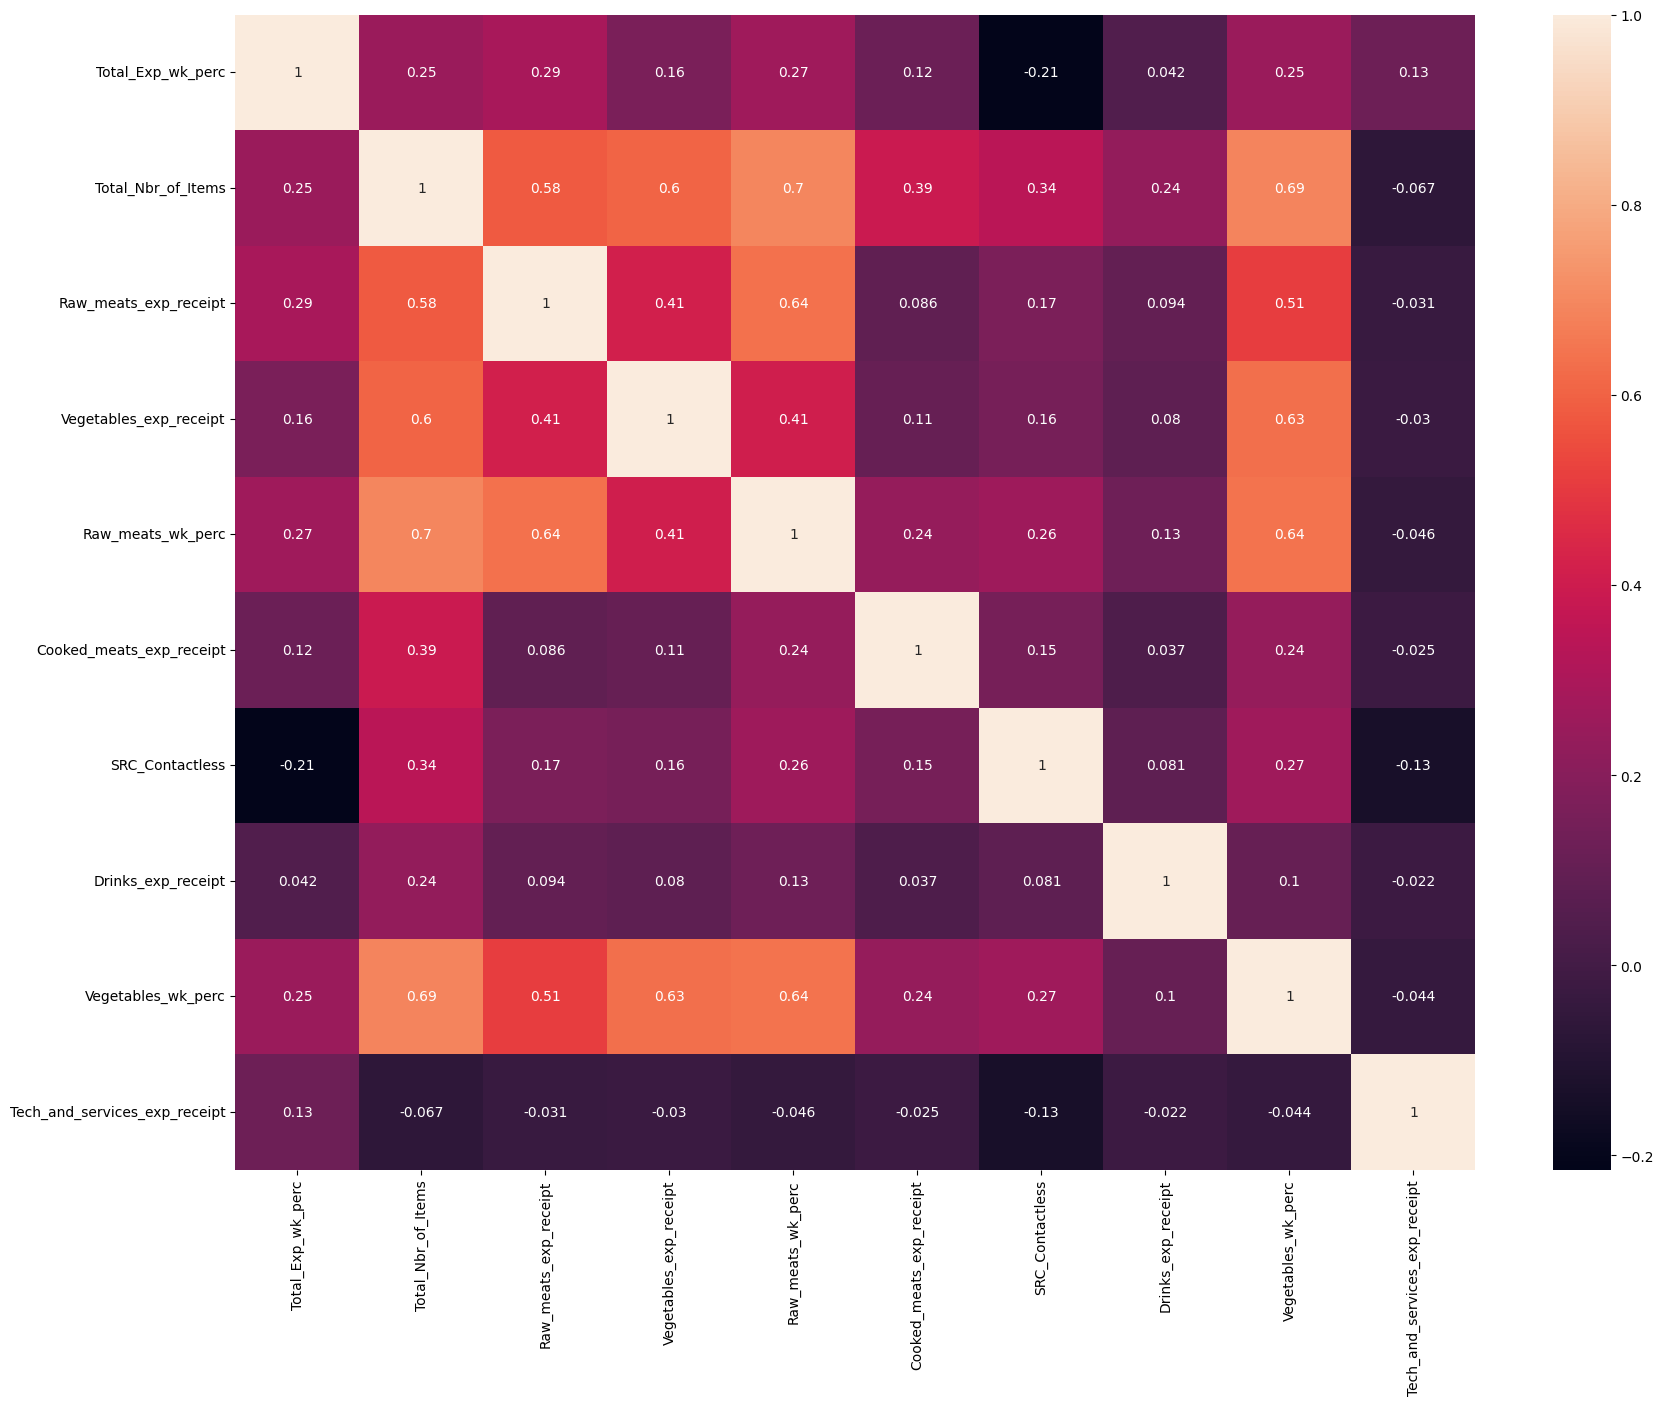

In [41]:
# Plotting the correlation matrix for the top 10 features by information gain
plt.figure(figsize = (20,15))
sb.heatmap(X_train_t40[top_10_info_gain].corr(), annot = True)

In [42]:
correlations = X_train_t40.corr()
Total_Nbr_of_Items = correlations.Total_Nbr_of_Items.nlargest(10).sort_values()
Total_Nbr_of_Items


Snacks_exp_receipt        0.469049
Snacks_wk_perc            0.472533
Dairy_produce_wk_perc     0.487256
Aldi                      0.534407
Cooked_meats_wk_perc      0.564873
Raw_meats_exp_receipt     0.581347
Vegetables_exp_receipt    0.602250
Vegetables_wk_perc        0.689218
Raw_meats_wk_perc         0.695149
Total_Nbr_of_Items        1.000000
Name: Total_Nbr_of_Items, dtype: float64

<h1 style="color: green;">Regression: modelling Total_Price</h1>

<h3 style="color: green;">Hyperparameter tuning with GridSearchCV</h3>

In [43]:
keys = ['LR','Ridge','Lasso','ENet','SGDR','RFR','GBR','AdaBR','KNNR','SVR','LSVR','KernelRi','XGB'] 

models_list = {
    'LR': LinearRegression(),
    'Ridge': Ridge(),
    'Lasso': Lasso(),
    'ENet': ElasticNet(),
    'SGDR': SGDRegressor(),
    'RFR': RandomForestRegressor(),
    'GBR': GradientBoostingRegressor(),
    'AdaBR': AdaBoostRegressor(),
    'KNNR': KNeighborsRegressor(),
    'SVR': SVR(),
    'LSVR': LinearSVR(),
    'KernelRi': KernelRidge(),
    'XGB': XGBRegressor()
}

param_list = {
    'LR': {
    'fit_intercept': [True]
    },
    
    'Ridge':{
    'solver':['svd','cholesky','lsqr','sag'],
    'alpha': [1e-5,1e-4,1e-3,1e-2,1e-1,1,10,100],
    'random_state': [4]
    },
    
    'Lasso':{'alpha': [0.02,0.024,0.025,0.03],
                'max_iter': [100000],
                'random_state': [4]
            },
    
    'ENet':{
        'alpha': [1e-5,1e-4,1e-3,1e-2,1e-1,1,10,100], 
        'max_iter': [100000], 
        'random_state': [4],
        'l1_ratio':  [0.05,0.1,0.15,0.25,0.5,0.6],
        'random_state': [4]
    },
    
    'SGDR':{
        'alpha': [1e-5,1e-4,1e-3,1e-2,1e-1,1],
        'max_iter':[100000],
        'tol':[1e-4,1e-3,1e-1],
        'penalty': ['l1','l2'],
        'learning_rate': ['optimal','invscaling'],
        'random_state': [4]
    },
    
    'RFR':{
        'n_estimators': [100,300,600],
        'criterion': ['squared_error','absolute_error'],
        'random_state': [4]
    },
    
    'GBR':{
        'loss': ['squared_error','huber'],
        'learning_rate': (0.1,0.25,0.5,1),
        'max_features': ['sqrt','log2'],
        'n_estimators': [100,300,600],
        'random_state': [4]
    },
    
    'AdaBR':{
        'n_estimators': [100,300,600],
        'learning_rate': (0.05,0.25,0.5,1),
        'loss': ['linear','square'],
        'random_state': [4]
    },
    
    'KNNR': {
        'n_neighbors': [3,4,5,6,10],
        'weights': ['uniform','distance'],
        'algorithm': ['auto','ball_tree','kd_tree','brute']
    },
    
    'SVR':{
        'kernel': ['linear','poly','rbf','sigmoid'],
        'tol': [1e-4,1e-3,1e-1]
    },
    'LSVR':{
        'tol': [1e-5,1e-4,1e-3,1e-2,1e-1],
        'loss': ['epsilon_insensitive','squared_epsilon_insensitive'],
        'max_iter': [100000],
        'random_state': [4]
    },
    
    'KernelRi':{
        'alpha':[1e-5,1e-4,1e-3,1e-2,1e-1,1,10,100],
        'kernel': ['polynomial','linear'],
        'degree':  [1,2,3],
        'coef0': [1,1.5,2,2.5,3]
    },
    'XGB':{
        'max_depth':[4,6,8],
        'min_child_weight':[4,6,8],
        'gamma':[0,1],
        'learning_rate': [0.1,0.05,0.01],
        'n_estimators':[100,300,500],
        'random_state':[4]
    }
}

In [44]:
def gridSearch_run(keys, param_list, models_list, X_train, y_train, X_test, y_test):
    
    # Scoring metric
    # defining the scoring parameter to be passed into GridSearchCV
    # 'neg_mean_squared_error', metrics.mean_squared_error is used here
    # make_scorer and set greater_is_better to false to make sure 
    # GridSearchCV optimizes the hyperparameters correctly
    scoring_metrics = make_scorer(mean_squared_error, greater_is_better=False)

    # Alternative
    # scoring_metrics = "neg_mean_squared_error"

    key_model_params = []
    for key in keys:
        string = []
        string.append(key)
        string.append(param_list[key])

        gs = GridSearchCV(models_list[key],
                          param_grid=param_list[key],
                          cv=5, 
                          verbose=True, 
                          n_jobs=-1,
                          scoring=scoring_metrics
                         )

        #gs.fit(X_train,y_train)
        gs.fit(X_train, np.ravel(y_train))

        y_train_pred = gs.predict(X_train)
        y_test_pred = gs.predict(X_test)

        string.append(gs.best_params_)
        string.append(-gs.best_score_)
        string.append(np.sqrt(-gs.best_score_))

        string.append(explained_variance_score(y_train,y_train_pred))
        string.append(r2_score(y_train,y_train_pred))

        string.append(-gs.score(X_test,y_test))
        string.append(np.sqrt(-gs.score(X_test,y_test)))

        string.append(explained_variance_score(y_test,y_test_pred))
        string.append(r2_score(y_test,y_test_pred))
        key_model_params.append(string)


    return key_model_params
    
    
    

In [45]:
top_40_gridSearch = gridSearch_run(keys, param_list, models_list, X_train_t40, y_train_t40, X_test_t40,y_test_t40)


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 32 candidates, totalling 160 fits


/home/kapanga/Documents/Python/Home Shopping ML/venv/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/kapanga/Documents/Python/Home Shopping ML/venv/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/kapanga/Documents/Python/Home Shopping ML/venv/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/kapanga/Documents/Python/Home Shopping ML/venv/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Fitting 5 folds for each of 4 candidates, totalling 20 fits
Fitting 5 folds for each of 48 candidates, totalling 240 fits
Fitting 5 folds for each of 72 candidates, totalling 360 fits


/home/kapanga/Documents/Python/Home Shopping ML/venv/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1548: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/home/kapanga/Documents/Python/Home Shopping ML/venv/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1548: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/home/kapanga/Documents/Python/Home Shopping ML/venv/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1548: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/home/kapanga/Documents/Python/Home Shopping ML/venv/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1548: ConvergenceWarning: Maximum number of iter

Fitting 5 folds for each of 6 candidates, totalling 30 fits
Fitting 5 folds for each of 48 candidates, totalling 240 fits
Fitting 5 folds for each of 24 candidates, totalling 120 fits
Fitting 5 folds for each of 40 candidates, totalling 200 fits
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits


/home/kapanga/Documents/Python/Home Shopping ML/venv/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/kapanga/Documents/Python/Home Shopping ML/venv/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Fitting 5 folds for each of 240 candidates, totalling 1200 fits
Fitting 5 folds for each of 162 candidates, totalling 810 fits


In [46]:
Top_40_model_output = pd.DataFrame(top_40_gridSearch, columns =['Model',
                                                            'Param_list_in',
                                                            'best_params',
                                                            'train_mse',
                                                            'train_rmse',
                                                            'Explained_var_train',
                                                            'R_squared_train',
                                                            'test_mse',
                                                            'test_rmse',
                                                            'Explained_var_test',
                                                            'R_squared_test'])
Top_40_model_output.sort_values(by='test_mse', ascending=True)


,Model,Param_list_in,best_params,train_mse,train_rmse,Explained_var_train,R_squared_train,test_mse,test_rmse,Explained_var_test,R_squared_test
12,XGB,"{'max_depth': [4, 6, 8], 'min_child_weight': [...","{'gamma': 0, 'learning_rate': 0.05, 'max_depth...",0.045642,0.213639,0.998765,0.998765,0.043302,0.208092,0.955464,0.955324
5,RFR,"{'n_estimators': [100, 300, 600], 'criterion':...","{'criterion': 'absolute_error', 'n_estimators'...",0.065586,0.256098,0.992657,0.992621,0.063334,0.251663,0.935416,0.934656
6,GBR,"{'loss': ['squared_error', 'huber'], 'learning...","{'learning_rate': 0.1, 'loss': 'squared_error'...",0.103916,0.322360,0.995368,0.995368,0.079621,0.282171,0.919175,0.917852
7,AdaBR,"{'n_estimators': [100, 300, 600], 'learning_ra...","{'learning_rate': 0.25, 'loss': 'linear', 'n_e...",0.174482,0.417710,0.909194,0.888581,0.156849,0.396041,0.849672,0.838174
11,KernelRi,"{'alpha': [1e-05, 0.0001, 0.001, 0.01, 0.1, 1,...","{'alpha': 1, 'coef0': 2, 'degree': 3, 'kernel'...",0.190864,0.436880,0.964920,0.964920,0.211853,0.460275,0.781565,0.781423
4,SGDR,"{'alpha': [1e-05, 0.0001, 0.001, 0.01, 0.1, 1]...","{'alpha': 0.01, 'learning_rate': 'invscaling',...",0.280604,0.529721,0.768099,0.768099,0.241350,0.491274,0.751759,0.750990
2,Lasso,"{'alpha': [0.02, 0.024, 0.025, 0.03], 'max_ite...","{'alpha': 0.02, 'max_iter': 100000, 'random_st...",0.279381,0.528565,0.757056,0.757056,0.243044,0.492995,0.749670,0.749243
3,ENet,"{'alpha': [1e-05, 0.0001, 0.001, 0.01, 0.1, 1,...","{'alpha': 0.01, 'l1_ratio': 0.6, 'max_iter': 1...",0.280706,0.529817,0.771733,0.771733,0.244029,0.493993,0.749212,0.748226
10,LSVR,"{'tol': [1e-05, 0.0001, 0.001, 0.01, 0.1], 'lo...","{'loss': 'squared_epsilon_insensitive', 'max_i...",0.325958,0.570927,0.775541,0.775541,0.250797,0.500796,0.742793,0.741244
0,LR,{'fit_intercept': [True]},{'fit_intercept': True},0.366711,0.605567,0.775548,0.775548,0.250822,0.500822,0.742803,0.741218


In [47]:
top_30_gridSearch = gridSearch_run(keys, param_list, models_list, X_train_t30, y_train_t30, X_test_t30,y_test_t30)


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 32 candidates, totalling 160 fits
Fitting 5 folds for each of 4 candidates, totalling 20 fits
Fitting 5 folds for each of 48 candidates, totalling 240 fits
Fitting 5 folds for each of 72 candidates, totalling 360 fits


/home/kapanga/Documents/Python/Home Shopping ML/venv/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1548: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/home/kapanga/Documents/Python/Home Shopping ML/venv/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1548: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/home/kapanga/Documents/Python/Home Shopping ML/venv/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1548: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/home/kapanga/Documents/Python/Home Shopping ML/venv/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1548: ConvergenceWarning: Maximum number of iter

Fitting 5 folds for each of 6 candidates, totalling 30 fits
Fitting 5 folds for each of 48 candidates, totalling 240 fits
Fitting 5 folds for each of 24 candidates, totalling 120 fits
Fitting 5 folds for each of 40 candidates, totalling 200 fits
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits


/home/kapanga/Documents/Python/Home Shopping ML/venv/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Fitting 5 folds for each of 240 candidates, totalling 1200 fits
Fitting 5 folds for each of 162 candidates, totalling 810 fits


In [48]:
Top_30_model_output = pd.DataFrame(top_30_gridSearch, columns =['Model',
                                                            'Param_list_in',
                                                            'best_params',
                                                            'train_mse',
                                                            'train_rmse',
                                                            'Explained_var_train',
                                                            'R_squared_train',
                                                            'test_mse',
                                                            'test_rmse',
                                                            'Explained_var_test',
                                                            'R_squared_test'])
Top_30_model_output.sort_values(by='test_mse', ascending=True)

,Model,Param_list_in,best_params,train_mse,train_rmse,Explained_var_train,R_squared_train,test_mse,test_rmse,Explained_var_test,R_squared_test
12,XGB,"{'max_depth': [4, 6, 8], 'min_child_weight': [...","{'gamma': 0, 'learning_rate': 0.1, 'max_depth'...",0.042861,0.207029,0.999259,0.999259,0.043674,0.208983,0.955064,0.954940
5,RFR,"{'n_estimators': [100, 300, 600], 'criterion':...","{'criterion': 'absolute_error', 'n_estimators'...",0.063097,0.251191,0.993111,0.993094,0.061245,0.247478,0.937499,0.936811
6,GBR,"{'loss': ['squared_error', 'huber'], 'learning...","{'learning_rate': 0.1, 'loss': 'squared_error'...",0.094476,0.307369,0.995041,0.995041,0.082280,0.286844,0.915960,0.915109
11,KernelRi,"{'alpha': [1e-05, 0.0001, 0.001, 0.01, 0.1, 1,...","{'alpha': 1, 'coef0': 2, 'degree': 3, 'kernel'...",0.182497,0.427197,0.959523,0.959523,0.125519,0.354287,0.870498,0.870497
7,AdaBR,"{'n_estimators': [100, 300, 600], 'learning_ra...","{'learning_rate': 0.25, 'loss': 'linear', 'n_e...",0.172299,0.415089,0.907513,0.885928,0.163632,0.404514,0.843692,0.831175
9,SVR,"{'kernel': ['linear', 'poly', 'rbf', 'sigmoid'...","{'kernel': 'rbf', 'tol': 0.001}",0.243296,0.493251,0.896916,0.896246,0.232862,0.482558,0.761279,0.759748
2,Lasso,"{'alpha': [0.02, 0.024, 0.025, 0.03], 'max_ite...","{'alpha': 0.02, 'max_iter': 100000, 'random_st...",0.315926,0.562073,0.718334,0.718334,0.247021,0.497012,0.745241,0.745140
4,SGDR,"{'alpha': [1e-05, 0.0001, 0.001, 0.01, 0.1, 1]...","{'alpha': 0.01, 'learning_rate': 'invscaling',...",0.313686,0.560076,0.727655,0.727626,0.249795,0.499795,0.742602,0.742277
3,ENet,"{'alpha': [1e-05, 0.0001, 0.001, 0.01, 0.1, 1,...","{'alpha': 0.01, 'l1_ratio': 0.6, 'max_iter': 1...",0.313570,0.559973,0.732603,0.732603,0.251247,0.501246,0.740974,0.740779
10,LSVR,"{'tol': [1e-05, 0.0001, 0.001, 0.01, 0.1], 'lo...","{'loss': 'squared_epsilon_insensitive', 'max_i...",0.319003,0.564804,0.735655,0.735655,0.254075,0.504059,0.738167,0.737861


<p>
The top 40 percentile features models have approximately the same performance as the top 30 percentile <br>
features models, more parsimonious models.
</p>

In [49]:
top_10_gridSearch = gridSearch_run(keys, param_list, models_list, X_train_t10, y_train_t10, X_test_t10,y_test_t10)


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 32 candidates, totalling 160 fits
Fitting 5 folds for each of 4 candidates, totalling 20 fits
Fitting 5 folds for each of 48 candidates, totalling 240 fits
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Fitting 5 folds for each of 48 candidates, totalling 240 fits
Fitting 5 folds for each of 24 candidates, totalling 120 fits
Fitting 5 folds for each of 40 candidates, totalling 200 fits
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 240 candidates, totalling 1200 fits
Fitting 5 folds for each of 162 candidates, totalling 810 fits


In [50]:
Top_10_model_output = pd.DataFrame(top_10_gridSearch, columns =['Model',
                                                            'Param_list_in',
                                                            'best_params',
                                                            'train_mse',
                                                            'train_rmse',
                                                            'Explained_var_train',
                                                            'R_squared_train',
                                                            'test_mse',
                                                            'test_rmse',
                                                            'Explained_var_test',
                                                            'R_squared_test'])
Top_10_model_output.sort_values(by='test_mse', ascending=True)

,Model,Param_list_in,best_params,train_mse,train_rmse,Explained_var_train,R_squared_train,test_mse,test_rmse,Explained_var_test,R_squared_test
6,GBR,"{'loss': ['squared_error', 'huber'], 'learning...","{'learning_rate': 0.1, 'loss': 'squared_error'...",0.351565,0.592929,0.844455,0.844455,0.292604,0.540929,0.698911,0.698110
9,SVR,"{'kernel': ['linear', 'poly', 'rbf', 'sigmoid'...","{'kernel': 'rbf', 'tol': 0.0001}",0.427075,0.653510,0.654272,0.648325,0.301217,0.548832,0.699015,0.689224
12,XGB,"{'max_depth': [4, 6, 8], 'min_child_weight': [...","{'gamma': 0, 'learning_rate': 0.05, 'max_depth...",0.378004,0.614820,0.794963,0.794959,0.316157,0.562278,0.674125,0.673810
8,KNNR,"{'n_neighbors': [3, 4, 5, 6, 10], 'weights': [...","{'algorithm': 'auto', 'n_neighbors': 10, 'weig...",0.380229,0.616627,0.687988,0.684593,0.329583,0.574093,0.667255,0.659957
5,RFR,"{'n_estimators': [100, 300, 600], 'criterion':...","{'criterion': 'absolute_error', 'n_estimators'...",0.383982,0.619663,0.944980,0.944980,0.345625,0.587899,0.643953,0.643406
11,KernelRi,"{'alpha': [1e-05, 0.0001, 0.001, 0.01, 0.1, 1,...","{'alpha': 10, 'coef0': 2, 'degree': 3, 'kernel...",0.438051,0.661854,0.659254,0.659254,0.372038,0.609949,0.616210,0.616155
7,AdaBR,"{'n_estimators': [100, 300, 600], 'learning_ra...","{'learning_rate': 1, 'loss': 'linear', 'n_esti...",0.463533,0.680833,0.621804,0.617831,0.403314,0.635070,0.587042,0.583887
10,LSVR,"{'tol': [1e-05, 0.0001, 0.001, 0.01, 0.1], 'lo...","{'loss': 'squared_epsilon_insensitive', 'max_i...",0.553297,0.743840,0.487637,0.487636,0.421876,0.649520,0.565012,0.564735
0,LR,{'fit_intercept': [True]},{'fit_intercept': True},0.554774,0.744831,0.487858,0.487858,0.423634,0.650872,0.563161,0.562922
4,SGDR,"{'alpha': [1e-05, 0.0001, 0.001, 0.01, 0.1, 1]...","{'alpha': 0.01, 'learning_rate': 'invscaling',...",0.547034,0.739617,0.485988,0.485980,0.425789,0.652525,0.560818,0.560698


<p style="color: black;">
The performance for the top 10 percentile features GridSearch are less than the top 40 and top 30.<br>
So developing models with the top 10 percentile doesn't optimise RMSE.<br>
Hence, it doesn't account for as much of the variation as more complexed models.<br><br>
On the basis of the performance metrics of the three top percentile features, the next step will utilize the<br>
top 30 percentile features: It's more parsimonious than the top 40<br><br>
From the top 30 percentile features, the best params for the top 4 models judging by test rmse will be used<br>
to compare the models with cross validation and also an ensemble voting regressor before a final decision is<br>
made as to which model we will go ahead with.
</p>

In [51]:
# Retrieving the best params for XBG
x = Top_30_model_output[['Model','best_params']].query("Model=='XGB'")
z = x.best_params.to_list()
z

[{'gamma': 0,
  'learning_rate': 0.1,
  'max_depth': 4,
  'min_child_weight': 6,
  'n_estimators': 500,
  'random_state': 4}]

In [52]:
# Retrieving the best params for RFR
x = Top_30_model_output[['Model','best_params']].query("Model=='RFR'")
z = x.best_params.to_list()
z

[{'criterion': 'absolute_error', 'n_estimators': 100, 'random_state': 4}]

In [53]:
# Retrieving the best params for GBR
x = Top_30_model_output[['Model','best_params']].query("Model=='GBR'")
z = x.best_params.to_list()
z

[{'learning_rate': 0.1,
  'loss': 'squared_error',
  'max_features': 'sqrt',
  'n_estimators': 600,
  'random_state': 4}]

In [67]:
# Retrieving the best params for KernelRi
x = Top_30_model_output[['Model','best_params']].query("Model=='KernelRi'")
z = x.best_params.to_list()
z


[{'alpha': 1, 'coef0': 2, 'degree': 3, 'kernel': 'polynomial'}]

In [54]:
# Retrieving the best params for AdaBR
# x = Top_30_model_output[['Model','best_params']].query("Model=='AdaBR'")
# z = x.best_params.to_list()
# z

[{'learning_rate': 0.25,
  'loss': 'linear',
  'n_estimators': 100,
  'random_state': 4}]

In [55]:
# Perform cross validation, cv=10, scoring with models built with the hyperparameters above 
# to see how well each model does as a representation of the robustness of model against unseen data

<h3 style="color: green;">Cross validation scoring</h3>
<p style="color: black;">
Cross validation provides the best average indicator of model performance on unseen data.<br>
Below we compare the best four models from the top 30 percentile feature selection against each other<br>
with cv=10 as a measure of average performance on unseen data.<br>
<b>Note, this is using the training dataset not the testing/validation</b>
</p>

In [68]:
models = [       
          RandomForestRegressor(
              n_estimators=100,
              criterion='absolute_error',
              random_state=4
          ),

          GradientBoostingRegressor(
              n_estimators=600,
              learning_rate=0.1,
              loss='squared_error',
              max_features='sqrt',
              random_state=4
          ),
    
          KernelRidge(
              alpha=1,
              coef0=2,
              degree=3,
              kernel='polynomial'
          ),
    
          #AdaBoostRegressor(
              #random_state=4, 
              #n_estimators=100,
              #loss='linear',
              #learning_rate=0.25
          #),

          
          XGBRegressor(
              gamma=0,
              learning_rate=0.1,
              max_depth=4,
              min_child_weight=6,
              n_estimators=500,
              random_state=4
          )
          
          ]


In [69]:
names = ['RFR',
         'GBR',
         'KernelRi',
         #'AdaBR',
         'XGB']


In [70]:
models_list = zip(names,models)
for model in models_list:
    print(model)

('RFR', RandomForestRegressor(criterion='absolute_error', n_estimators=300,
                      random_state=4))
('GBR', GradientBoostingRegressor(max_features='sqrt', n_estimators=600, random_state=4))
('KernelRi', KernelRidge(coef0=2, kernel='polynomial'))
('XGB', XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=4, max_leaves=None,
             min_child_weight=6, missing=nan, monotone_constraints=None,
             n_estimators=500, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=4, ...))


In [71]:
# RMSE function
def rmse_cv(model,X,y):
    rmse = np.sqrt(-cross_val_score(model,X,y, scoring="neg_mean_squared_error",cv=10))
    return rmse



In [72]:
models_list = zip(names,models)
Model_rmse = []
for name,model in models_list:
    string = []
    score = rmse_cv(model,X_train_t30,np.ravel(y_train_t30))
    string.append(name)
    string.append(score.mean())
    string.append(score.std())
    Model_rmse.append(string)
#     print("{}: {:.6f}, {:4f}".format(name,score.mean(),score.std()))

In [73]:
Model_rmse = pd.DataFrame(Model_rmse, columns=['Model','Mean_score', 'STD_score'])
Model_rmse.sort_values(by=['Mean_score','STD_score'], ascending=True)


,Model,Mean_score,STD_score
3,XGB,0.186778,0.060031
0,RFR,0.214184,0.083188
1,GBR,0.278997,0.051735
2,KernelRi,0.401089,0.087568


<p>
The mean_score (average rmse) of cross validation for XGB <b>0.186778</b> is lower than<br>
the test rmse for the top 30 percentile <b>0.208983</b>, which used 5 cross validations of the same dataset.<br>
The mean score of RFR is <b>0.214184</b> which is also lower than its top 30 percentile <b>0.251663</b>
The mean score of GBR is <b>0.278997</b> which is also lower than its top 30 percentile <b>0.282171</b>
<br><br>In conclusion, the output tells us that on average the top 3 models (XGB, RFR, and GBR) are more robust to<br> the variability of unseen data while the rest, on average, are less robust to such variability.
</p>

<h3 style="color: green;">Ensemble VotingRegressor</h3>
<p>
From the top 30 percentile features gridsearch, a few models performed well. Below we group those few models,<br>
an ensemble, to see if they outperform the best amongst them on it's own.
</p>

In [75]:
voting = VotingRegressor([
                          ('RFR',RandomForestRegressor(
                              n_estimators=100,
                              criterion='absolute_error',
                              random_state=4
                          )),
    
                          ('GBR',GradientBoostingRegressor(
                              n_estimators=600,
                              learning_rate=0.1,
                              loss='squared_error',
                              max_features='sqrt',
                              random_state=4
                          )),
                          ('KernelRi',KernelRidge(
                              alpha=1,
                              coef0=2,
                              degree=3,
                              kernel='polynomial'
                          )),
                           
                          #('AdaBR',AdaBoostRegressor(
                              #random_state=4, 
                              #n_estimators=100,
                              #loss='linear',
                              #learning_rate=0.25)
                          #),
                           
                          ('XGBR',XGBRegressor(
                              gamma=0,
                              learning_rate=0.1,
                              max_depth=4,
                              min_child_weight=6,
                              n_estimators=500,
                              random_state=4
                          ))])


print(len(voting.estimators))

# Fitting the models on X_train y_train
voting.fit(X_train_t30, np.ravel(y_train_t30))

4


VotingRegressor(estimators=[('RFR',
                             RandomForestRegressor(criterion='absolute_error',
                                                   random_state=4)),
                            ('GBR',
                             GradientBoostingRegressor(max_features='sqrt',
                                                       n_estimators=600,
                                                       random_state=4)),
                            ('KernelRi',
                             KernelRidge(coef0=2, kernel='polynomial')),
                            ('XGBR',
                             XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=Non...
                                          gamma=0, gpu_id=None,
                                          grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=0.1, max_bin=None,
                                          max_cat_threshold=None,
                                          max_cat_to_onehot=None,
                                          max_delta_step=None, max_depth=4,
                                          max_leaves=None, min_child_weight=6,
                                          missing=nan,
                                          monotone_constraints=None,
                                          n_estimators=500, n_jobs=None,
                                          num_parallel_tree=None,
                                          predictor=None, random_state=4, ...))])

In [76]:
# predict y_train
Voting_train_y_pred = voting.predict(X_train_t30)

# Retrieve the training rmse,r2_score
print("Voting training RMSE: {}".format(np.sqrt(mean_squared_error(y_train_t30,Voting_train_y_pred))))
print("Voting training R-squared: {}\n".format(r2_score(y_train_t30,Voting_train_y_pred)))


# Predicting X_test
Voting_test_y_pred = voting.predict(X_test_t30)
# Retrieve the test rmse,r2_score
print("\nVoting test RMSE: {}".format(np.sqrt(mean_squared_error(y_test_t30,Voting_test_y_pred))))
print("Voting test R-squared: {}".format(r2_score(y_test_t30,Voting_test_y_pred)))

Voting training RMSE: 0.07385516805857258
Voting training R-squared: 0.99454541415104


Voting test RMSE: 0.23310857831067663
Voting test R-squared: 0.9439358818548544


<h3 style="color: green;">Working with the best model</h3>

In [77]:
# Instantiating the best model
XGB = XGBRegressor(
    gamma=0,
    learning_rate=0.1,
    max_depth=4,
    min_child_weight=6,
    n_estimators=500,
    random_state=4
)

XGB.fit(X_train_t30, y_train_t30)

# predict y_train
train_y_pred = XGB.predict(X_train_t30)

# Retrieve the training rmse,r2_score
print("Training RMSE: {}".format(np.sqrt(mean_squared_error(y_train_t30,train_y_pred))))
print("Training R-squared: {}\n".format(r2_score(y_train_t30,train_y_pred)))


test_y_pred = XGB.predict(X_test_t30)
# Retrieve the test rmse,r2_score
print("\nTest RMSE: {}".format(np.sqrt(mean_squared_error(y_test_t30,test_y_pred))))
print("Test R-squared: {}".format(r2_score(y_test_t30,test_y_pred)))

Training RMSE: 0.027230202124660298
Training R-squared: 0.9992585160922501


Test RMSE: 0.208983115471392
Test R-squared: 0.9549400316369807


<p>
As can be seen, the best model, XGBRegressor, outperforms the ensemble in training and in test.<br>
So, it would be best to proceed with the XGBRegressor on it's own.<br><br>
In other words the crowd gets noisy while a lone voice in a forest speaks volume offering clarity!!!<br>
<b>But if a tree falls in the forest and there's no one there to check it, does it make noise?</b>
</p>

<h1 style="color: green;">Feature importance</h1>

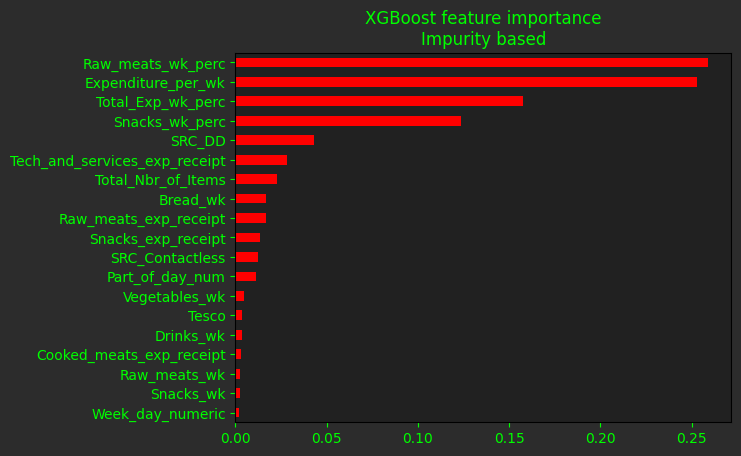

In [66]:
XGB_imp = pd.Series(XGB.feature_importances_, 
                    index=X_train_t30.columns)

# plotting importance
# figure background
fig = plt.figure()
fig.patch.set_facecolor('#212121')
fig.patch.set_alpha(0.95)

ax = fig.add_subplot(111)
ax.patch.set_facecolor('#212121')
ax.patch.set_alpha(1.0)
ax.yaxis.label.set_color('lime')
ax.xaxis.label.set_color('lime')
ax.title.set_color('lime')
ax.tick_params(colors='lime', which='both')


XGB_imp.nlargest(19).sort_values().plot(ax=ax,
                                        kind='barh', 
                                        color='red',
                                        title='XGBoost feature importance\nImpurity based')
plt.show()

<p>
The feature importance shows the most useful features in predicting the total price for receipts.<br>
The top 4 features make sense as the database is dominated with food shopping trips.<br>
SRC_DD represents direct debits, this is monthly service payments such as phone contract and gym memberships.<br>
</p>

<h1 style="color: green;">Saving the best model</h1>

In [78]:
# DO NOT RUN THIS AGAIN
# joblib.dump(XGB,'../Models/XGBRegressor_Model_04042023')

['../Models/XGBRegressor_Model_04042023']

<h1 style="color: green;">Making predictions with saved model</h1>

<h3 style="color: green;">Preparing a sample for predictions</h3>

In [94]:
sample_x = raw0[:30]
print(f"Sample shape before top 30: {sample_x.shape}")

sample_y = sample_x.Total_Price
print(f"Sample y shape: {sample_y.shape}")

# restricting features for transformation with X_scaler_Regressor28032023 
sample_x = sample_x[X_train_t30.columns]
print("Sample shape with top 30: {}".format(sample_x.shape))

Sample shape before top 30: (30, 132)
Sample y shape: (30,)
Sample shape with top 30: (30, 39)


<h3 style="color: green;">Loading the saved scaler y_scaler_top30_04042023</h3>

In [95]:
# Loading the y_scaler
y_scaler_load = joblib.load('../Models/y_scaler_top30_04042023')
y_scaler_load

StandardScaler()

In [96]:
# Scale transforming the sample y

sample_y =y_scaler_load.transform(sample_y.values.reshape(-1,1))

<h3 style="color: green;">Loading the saved scaler X_scaler_top30_Regressor04042023</h3>

In [97]:

x_scaler_loaded = joblib.load('../Models/X_scaler_top30_Regressor04042023')
x_scaler_loaded

StandardScaler()

In [98]:
# Transforming the sample
sample_x_transform = x_scaler_loaded.transform(sample_x)
sample_x_transform

array([[ 0.38614886,  0.06351199, -1.1108727 , ...,  1.50369914,
        -0.22380671, -0.26677309],
       [ 0.56505129, -0.44029258, -0.81270979, ...,  1.50369914,
        -0.22380671, -0.26677309],
       [ 0.56505129, -0.44029258, -0.81270979, ...,  1.50369914,
        -0.22380671, -0.26677309],
       ...,
       [-0.86616815,  1.5749257 , -0.81270979, ..., -0.66502665,
        -0.22380671, -0.26677309],
       [-0.86616815,  1.5749257 , -0.81270979, ..., -0.66502665,
        -0.22380671, -0.26677309],
       [-0.86616815,  1.07112113, -1.70719851, ..., -0.66502665,
        -0.22380671, -0.26677309]])

In [99]:
sample_x_T = pd.DataFrame(sample_x_transform, columns=X_train_t30.columns)
sample_x_T.head()

,Total_Nbr_of_Items,Week_day_numeric,Nbr_trips_per_wk,Expenditure_per_wk,Total_Exp_wk_perc,Part_of_day_num,SRC_Cash_or_plan,SRC_Contactless,SRC_DD,Bread_wk,...,Dairy_produce_wk_perc,Dairy_produce_exp_receipt,Education_exp_receipt,Tech_and_services_wk,Tech_and_services_exp_receipt,Tech_and_services_wk_exp_perc,Abbey_Sports,Aldi,Tesco,Yours_Supermarket
0,0.386149,0.063512,-1.110873,-0.863808,0.099484,-1.028146,-0.255609,0.57276,-0.324748,1.446671,...,0.346620,1.875749,-0.156992,-0.49502,-0.077711,-0.208747,-0.109859,1.503699,-0.223807,-0.266773
1,0.565051,-0.440293,-0.812710,-0.354193,-0.501104,0.264192,-0.255609,0.57276,-0.324748,0.520612,...,-0.476969,-0.350844,-0.156992,-0.49502,-0.077711,-0.208747,-0.109859,1.503699,-0.223807,-0.266773
2,0.565051,-0.440293,-0.812710,-0.868990,0.219638,0.264192,-0.255609,0.57276,-0.324748,-0.405447,...,0.621149,0.147971,-0.156992,-0.49502,-0.077711,-0.208747,-0.109859,1.503699,-0.223807,-0.266773
3,1.101759,-0.440293,-1.110873,-0.792486,0.168912,0.264192,-0.255609,0.57276,-0.324748,0.520612,...,1.719268,0.762452,-0.156992,-0.49502,-0.077711,-0.208747,-0.109859,1.503699,-0.223807,-0.266773
4,0.922856,-1.447902,-1.110873,-0.863808,0.313666,-1.028146,-0.255609,0.57276,-0.324748,1.446671,...,1.170208,1.875749,-0.156992,-0.49502,-0.077711,-0.208747,-0.109859,1.503699,-0.223807,-0.266773


<h3 style="color: green;">Reload a saved model</h3>

In [100]:
xgb_loaded = joblib.load('../Models/XGBRegressor_Model_04042023')

<h3 style="color: green;">Making predictions with a saved model</h3>

In [109]:
sample_y_pred = xgb_loaded.predict(sample_x_T)
sample_y_pred

array([-0.46940687, -0.5398985 , -0.39970484, -0.18092544, -0.34985548,
        1.2033863 , -0.03551087, -0.17165272, -0.3881941 ,  0.33134076,
       -0.2258943 ,  0.29081264, -0.09938854, -0.32204577, -0.3593479 ,
       -0.32256278,  0.6612814 , -0.55785346,  0.5502908 ,  0.02815967,
       -0.11375099,  1.7784042 , -0.9873504 ,  0.573757  ,  1.9234056 ,
        1.3616931 , -1.0527459 , -1.0371423 , -0.9419002 , -0.71595204],
      dtype=float32)

In [110]:
print("Sample RMSE: {}".format(np.sqrt(mean_squared_error(sample_y,sample_y_pred))))
print("Sample R-squared: {}".format(r2_score(sample_y,sample_y_pred)))

Sample RMSE: 0.08449466725257627
Sample R-squared: 0.9878558650516247


<p>
Above, the RMSE of the small sample used is higher than the RMSE of the test sample i.e. there is a drop in performance given the sample here. This is also reflected in the drop in R-squared, less of the total variation is accounted for by the model in this instance.
</p>

<h3 style="color: green;">Reverse transforming the predictions with y_scaler</h3>

In [113]:
# inverse transforming y_sample for comparison
sample_inverse_y = y_scaler_load.inverse_transform(sample_y)
sample_inverse_y

array([[ 6.78],
       [ 6.32],
       [ 7.44],
       [ 8.27],
       [ 8.1 ],
       [20.61],
       [11.18],
       [ 9.96],
       [ 8.22],
       [15.18],
       [ 9.49],
       [14.54],
       [10.82],
       [ 8.5 ],
       [ 8.15],
       [ 8.54],
       [18.67],
       [ 5.9 ],
       [17.3 ],
       [10.66],
       [11.25],
       [30.33],
       [ 2.  ],
       [18.98],
       [32.  ],
       [25.  ],
       [ 1.29],
       [ 1.29],
       [ 2.08],
       [ 2.99]])

In [114]:
# inverse transforming the sample predicted values
sample_inverse_y_pred = y_scaler_load.inverse_transform(sample_y_pred.reshape(1, -1))
sample_inverse_y_pred.reshape(30, 1)

array([[ 6.9617457],
       [ 6.243724 ],
       [ 7.6717243],
       [ 9.900192 ],
       [ 8.179485 ],
       [24.000673 ],
       [11.381372 ],
       [ 9.994643 ],
       [ 7.7889714],
       [15.118092 ],
       [ 9.442143 ],
       [14.705276 ],
       [10.7307205],
       [ 8.462753 ],
       [ 8.082797 ],
       [ 8.457487 ],
       [18.478838 ],
       [ 6.0608363],
       [17.348297 ],
       [12.029916 ],
       [10.584426 ],
       [29.857756 ],
       [ 1.6860175],
       [17.587322 ],
       [31.334728 ],
       [25.613173 ],
       [ 1.0199046],
       [ 1.1788421],
       [ 2.1489692],
       [ 4.450458 ]], dtype=float32)

<p>
As can be seen above, the reverse transform shows visually that the predictions are excellent approximations<br>
of the true values. This reflects the RMSE and the high R squared value.
</p>

<h1 style="color: green;">Summary</h1>
<p>
The regressor model development proccess was a success. The final model outperformed an ensemble of models in<br>
a champion challenge. The model has a very high testing R-squared, 0.95.<br><br>
The feature importance shows which features are influential. Intuitively, these features make sense.
</p>

<h1 style="color: green;">Model performance using evidently</h1>

<h3 style="color: green;">Generating predictions using the best model</h3>

In [ ]:
RFR_load = joblib.load('../Models/RandomForestRegressor_Model_16102022')
y_scaler_load = joblib.load('../Models/y_scaler16102022')
X_scaler_load = joblib.load('../Models/X_scaler16102022')

In [ ]:
# column names
col_names = X_train.columns

# generating prediction
y_pred_train = y_scaler_load.inverse_transform(RFR_load.predict(X_train).reshape(-1,1))
y_pred_test = y_scaler_load.inverse_transform(RFR_load.predict(X_test).reshape(-1,1))

# Inverse transforming the target and features
y_train = y_scaler_load.inverse_transform(y_train)
y_test = y_scaler_load.inverse_transform(y_test)

X_train = X_scaler_load.inverse_transform(X_train)
X_test = X_scaler_load.inverse_transform(X_test)


In [ ]:
# Converting the arrays to DataFrames
X_train = pd.DataFrame(X_train, columns=col_names)
X_test = pd.DataFrame(X_test, columns=col_names)

In [ ]:
# appending Total_Price as target
X_train['target']= y_train
X_test['target'] = y_test

# X_train.reset_index(inplace=True, drop=True)

# appending predictions
X_train['prediction']= y_pred_train
X_test['prediction'] = y_pred_test

In [ ]:
num_feat=['Total_Nbr_of_Items','Date_diff','Nbr_trips_per_wk', 'Nbr_items_per_wk',
       'Nbr_items_wk_perc', 'Expenditure_per_wk', 'Total_Exp_wk_perc', 'hour',
       'Payment_Type_num', 'Card_Source_num','Bread_receipt', 'Bread_wk', 'Bread_wk_perc', 'Bread_exp_receipt',
       'Bread_exp_wk', 'Bread_wk_exp_perc', 'Cooked_meats_receipt',
       'Cooked_meats_wk', 'Cooked_meats_wk_perc', 'Cooked_meats_exp_receipt',
       'Cooked_meats_exp_wk', 'Raw_meats_receipt', 'Raw_meats_wk',
       'Raw_meats_wk_perc', 'Raw_meats_exp_receipt', 'Raw_meats_exp_wk',
       'Raw_meats_wk_exp_perc', 'Eating_out_receipt', 'Eating_out_wk',
       'Eating_out_wk_perc', 'Eating_out_exp_receipt', 'Eating_out_exp_wk',
       'Eating_out_wk_exp_perc', 'Snacks_receipt', 'Snacks_wk',
       'Snacks_wk_perc','Snacks_exp_receipt', 'Snacks_exp_wk', 'Snacks_wk_exp_perc',
       'Drinks_receipt', 'Drinks_wk', 'Drinks_wk_perc', 'Drinks_exp_receipt',
       'Drinks_exp_wk', 'Drinks_wk_exp_perc', 'Vegetables_receipt',
       'Vegetables_wk', 'Vegetables_wk_perc', 'Vegetables_exp_receipt',
       'Vegetables_exp_wk', 'Vegetables_wk_exp_perc', 'Fruit_receipt',
       'Fruit_wk', 'Fruit_wk_perc', 'Fruit_exp_receipt', 'Fruit_exp_wk',
       'Fruit_wk_exp_perc', 'Cooking_base_receipt', 'Cooking_base_wk',
       'Cooking_base_wk_perc', 'Cooking_base_exp_receipt',
       'Cooking_base_exp_wk', 'Cooking_base_wk_exp_perc',
       'Dairy_produce_receipt', 'Dairy_produce_wk', 'Dairy_produce_wk_perc',
       'Dairy_produce_exp_receipt', 'Dairy_produce_exp_wk',
       'Dairy_produce_wk_exp_perc', 'Seasoning_receipt', 'Seasoning_wk',
       'Seasoning_wk_perc', 'Seasoning_exp_receipt', 'Seasoning_exp_wk',
       'Seasoning_wk_exp_perc', 'Breakfast_receipt','Breakfast_wk', 'Breakfast_wk_perc', 'Breakfast_exp_receipt',
       'Breakfast_exp_wk', 'Breakfast_wk_exp_perc', 'Transport_wk',
       'Transport_wk_perc', 'Transport_exp_receipt', 'Transport_exp_wk',
       'Transport_wk_exp_perc', 'DIY_receipt', 'DIY_wk', 'DIY_wk_perc',
       'DIY_exp_receipt', 'DIY_exp_wk', 'DIY_wk_exp_perc',
       'Electronics_receipt', 'Electronics_wk', 'Electronics_wk_perc',
       'Electronics_exp_receipt', 'Electronics_exp_wk',
       'Electronics_wk_exp_perc', 'Education_receipt', 'Education_wk',
       'Education_wk_perc', 'Education_exp_receipt', 'Education_exp_wk',
       'Education_wk_exp_perc', 'Tech_and_services_receipt',
       'Tech_and_services_wk', 'Tech_and_services_wk_perc',
       'Tech_and_services_exp_receipt', 'Tech_and_services_exp_wk',
       'Tech_and_services_wk_exp_perc', 'Cosmetics_and_selfcare_receipt',
       'Cosmetics_and_selfcare_wk', 'Cosmetics_and_selfcare_wk_perc',
       'Cosmetics_and_selfcare_exp_receipt', 'Cosmetics_and_selfcare_exp_wk',
       'Cosmetics_and_selfcare_wk_exp_perc','Clothes_and_shoes_receipt', 'Clothes_and_shoes_wk',
       'Clothes_and_shoes_wk_perc', 'Clothes_and_shoes_exp_receipt',
       'Clothes_and_shoes_exp_wk', 'Clothes_and_shoes_wk_exp_perc',
       'House_and_kitchen_receipt', 'House_and_kitchen_wk',
       'House_and_kitchen_wk_perc', 'House_and_kitchen_exp_receipt',
       'House_and_kitchen_exp_wk', 'House_and_kitchen_wk_exp_perc','target','prediction'
]
categorical_features = ['Part_of_day_num','Week_day_numeric']

<h5 style="color: green;">Column mapping</h5>

In [ ]:
# preparing for ColumnMapping
target = 'target'
prediction = 'prediction'
features = num_feat + categorical_features

Col_map = ColumnMapping(
    target,
    'prediction',
    numerical_features=num_feat,
    categorical_features=categorical_features
)


<h3 style="color: green;">Regression performance report</h3>

In [ ]:
RFR_dashboard = Dashboard(tabs=[RegressionPerformanceTab(verbose_level=1)])
RFR_dashboard.calculate(X_train, X_test, column_mapping=Col_map)
RFR_dashboard.save("../Reports/Random forest regressor performance report.html")